### Project: Thera Bank Personal Loan Campaign 
Problem Statement - Personal Loan Campaign Modelling
Thera Bank Personal Loan Campaign    
Objective:The classification goal is to predict the likelihood of a liability customer buying personal loans.

Attribute Information:  
ID: Customer ID  
Age: Customer's age in completed years  
Experience: #years of professional experience  
Income: Annual income of the customer (K)  
ZIP Code: Home Address ZIP  
Family: Family size of the customer  
CCAvg: Avg. spending on credit cards per month (K)  
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
Mortgage: Value of house mortgage if any. (K)  
Personal Loan: Did this customer accept the personal loan offered in the last campaign?  
Securities Account: Does the customer have a securities account with the bank?  
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  
Online: Does the customer use internet banking facilities?  
Credit card: Does the customer use a credit card issued by the bank?  

### Task1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. 

### Importing libraries

In [1]:
#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Import main lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#Set style options
sns.set_style('darkgrid')
sns.set(color_codes=True) # adds a nice background to the graphs
sns.set(rc={'figure.figsize':(9,9)}) #size of the plot
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Import model essentials
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression



### Importing dataset

In [2]:
#Read dataset from local dir and make copy of that dataframe
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df2 = df.copy()

In [3]:
# Column name treatment for convenience
df2.columns = [c.replace(' ', '_') for c in df2.columns] #In case columns has space, correct it by adding underscore

### Check datatype

In [4]:
#To Check datatypes in the dframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Statistical summary

In [5]:
df2.describe(include="all")

ID     Age  Experience  Income  ZIP_Code  Family   CCAvg  \
count 5000.00 5000.00     5000.00 5000.00   5000.00 5000.00 5000.00   
mean  2500.50   45.34       20.10   73.77  93152.50    2.40    1.94   
std   1443.52   11.46       11.47   46.03   2121.85    1.15    1.75   
min      1.00   23.00       -3.00    8.00   9307.00    1.00    0.00   
25%   1250.75   35.00       10.00   39.00  91911.00    1.00    0.70   
50%   2500.50   45.00       20.00   64.00  93437.00    2.00    1.50   
75%   3750.25   55.00       30.00   98.00  94608.00    3.00    2.50   
max   5000.00   67.00       43.00  224.00  96651.00    4.00   10.00   

       Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  \
count    5000.00   5000.00        5000.00             5000.00     5000.00   
mean        1.88     56.50           0.10                0.10        0.06   
std         0.84    101.71           0.29                0.31        0.24   
min         1.00      0.00           0.00                0.00        0.00   
25%         1.00      0.00           0.00                0.00        0.00   
50%         2.00      0.00           0.00                0.00        0.00   
75%         3.00    101.00           0.00                0.00        0.00   
max         3.00    635.00           1.00                1.00        1.00   

       Online  CreditCard  
count 5000.00     5000.00  
mean     0.60        0.29  
std      0.49        0.46  
min      0.00        0.00  
25%      0.00        0.00  
50%      1.00        0.00  
75%      1.00        1.00  
max      1.00        1.00

### Shape

In [6]:
df2.shape

(5000, 14)

### Null values or Incorrect imputation

In [7]:
df2.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df2.isnull().values.any()

False

In [9]:
df2['ZIP_Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
92182     32
92028     32
92521     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
93407     26
95064     26
95819     26
94501     26
95039     26
94105     25
94303     25
95060     25
94022     25
91107     25
94596     24
93117     24
93555     23
94080     23
95521     23
92717     22
91380     22
92612     22
94110     21
92647     21
91768     21
90034     20
90401     20
94117     20
94132     20
95747     19
92697     19
90025     19
94005     19
92122     19
90266     19
93940     18
94709     18
90840     18
92130     18
94122     18
94309     18
90291     18
92120     17
94583     17
92691     17
93023     17
92009     17
90630     17
92407     17
91311     17
90740     17
92096     17

In [10]:
df2['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

Two suspected error: 1. Zipcode one record with less than 5 digits 2.Experience marked as -1,-2,-3  

In [11]:
#Impute ZIPCode that has four digit with mode ZipCode. 
df2.loc[df2['ZIP_Code'] == 9307,'ZIP_Code']  = 94720

In [12]:
#Impute Experience less than 0 with 0. Also tried imputing with median, model performance was relatively low.    
df2.loc[df2['Experience'] < 0,'Experience']  = 0
df2['Experience'].min()

0

In [13]:
df2['Experience'].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
17    125
27    125
22    124
29    124
7     121
15    119
8     119
6     119
0     118
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
31    104
12    102
38     88
39     85
2      85
1      74
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

### Insights:

Data is from 5000 unique customers and have no nulls in any columns. 

However, One Zipcode has 4 digits(which has to be 5) and Experience of 52 customers were negative and need some treatment (Either median imputation or hardcoding to zero).  

Continous variables : Age, Experience, Income, Credit card Avg, Mortgage.  

Categorical variables: Family, Education,Personal_loan,securities_account,Cd_account, Online,Credit card, Zip code

### Task2: EDA: Study the data distribution in each attribute and target variable, share your findings 
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready

### Number of unique in each column? 

In [14]:
df2.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP_Code               466
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage?

In [15]:
len(df2[df2.Mortgage == 0].index)

3462

### Number of people with zero credit card spending per month?

In [16]:
len(df2[df2.CCAvg == 0].index)

106

### Value counts of all categorical columns.

In [17]:
cat_col = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard','ZIP_Code']
for i in cat_col:
     print("\n" + i)
     print(df2[i].value_counts())


Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

Online
1    2984
0    2016
Name: Online, dtype: int64

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

ZIP_Code
94720    170
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
94025     52
91711     52
92093     51
90245     50
90024     50
91330     46
90089     46
94304     45
92121     45
94143     37
95051     34
94608     34
92028     32
92521     32
92182     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
95819     26
95064     26
95039     26
93407     26
94501     26
94303     25
91107     25
95060     25
94022     25
94105     25
93117   

### Univariate Analysis

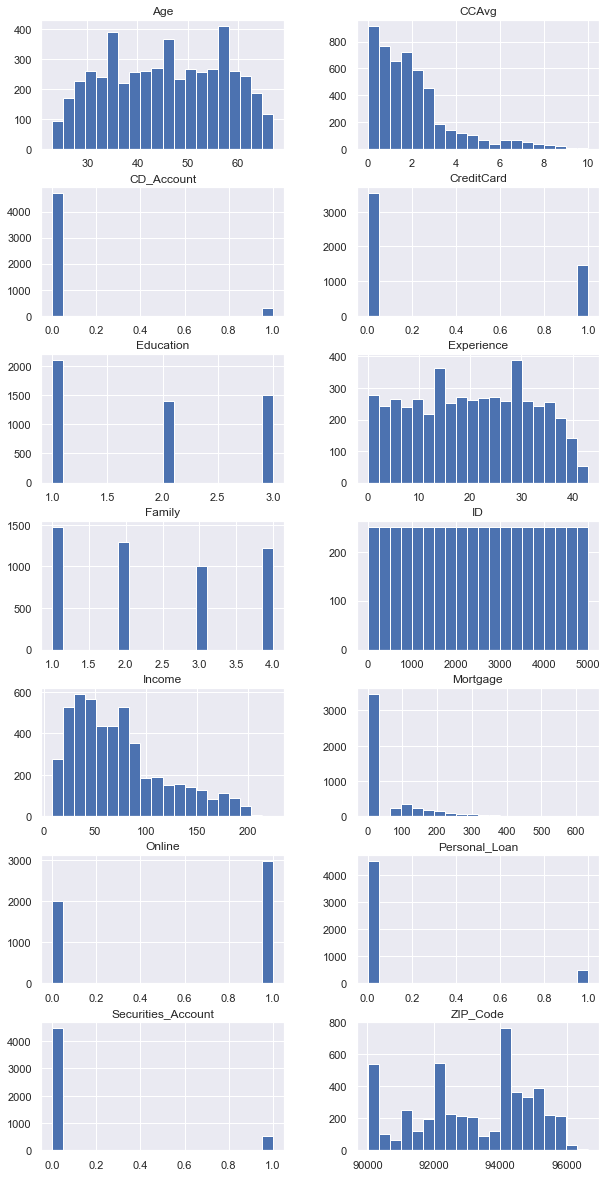

In [18]:
columns = list(df2) 
df2[columns].hist(stacked=False, bins=20, figsize=(10,30), layout=(10,2));

### Bivariate Analysis

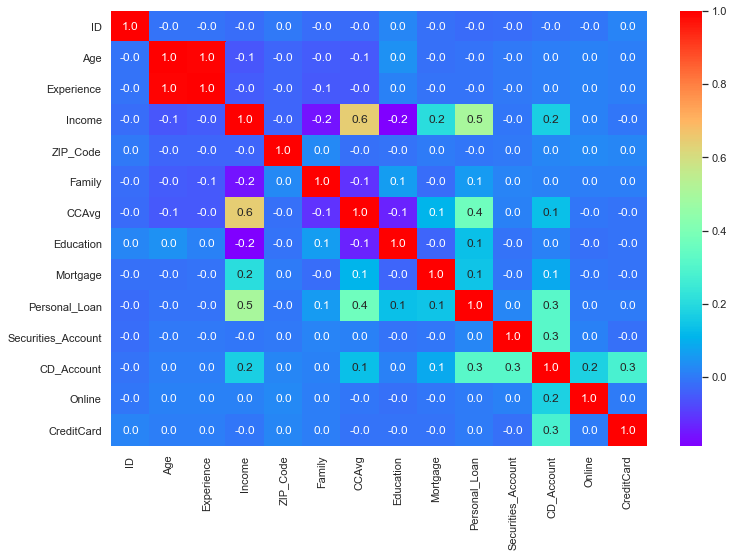

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,fmt='.1f',cmap='rainbow', )
plt.show()

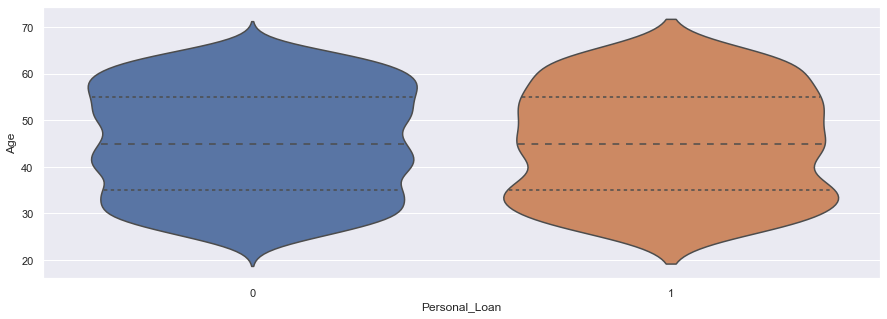

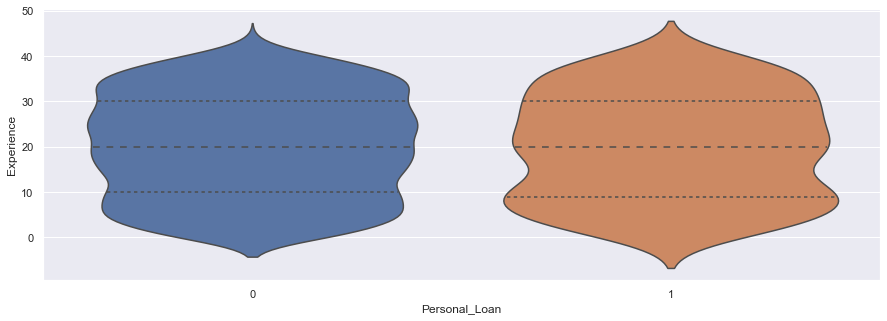

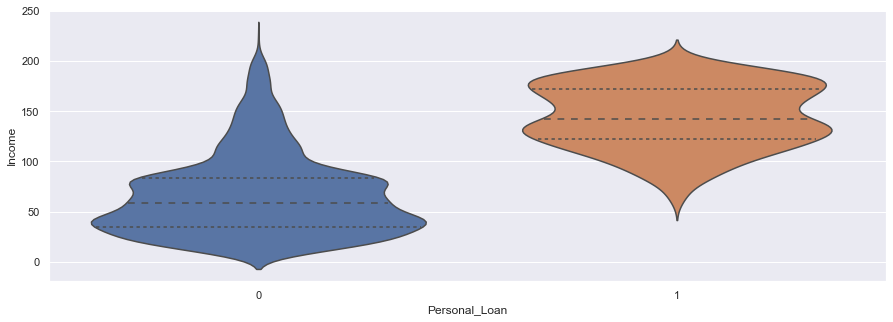

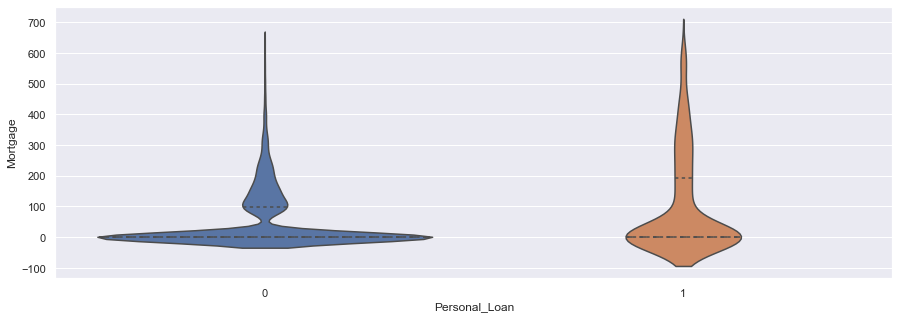

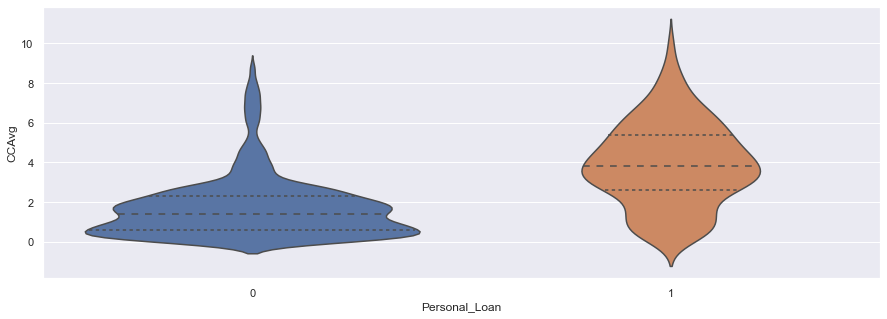

In [67]:
#Continous varibales vs Personal_Loan

con_col = ['Age', 'Experience', 'Income','Mortgage','CCAvg']

#plt.figure(figsize=(15,5))
for i in con_col:
    plt.figure(figsize=(15,5))
    sns.violinplot(x=df2['Personal_Loan'], y=df2[i],inner = 'quartile')
    plt.show()

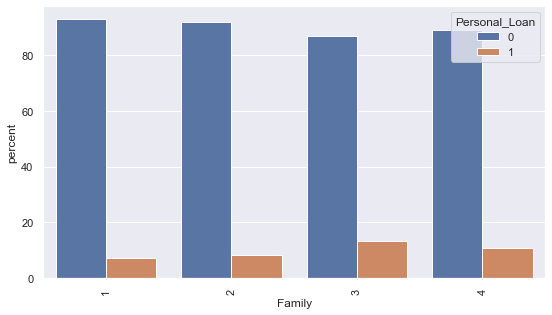

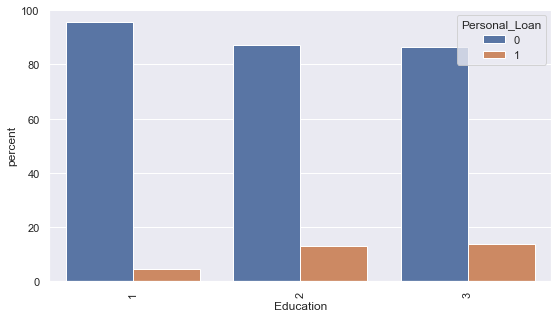

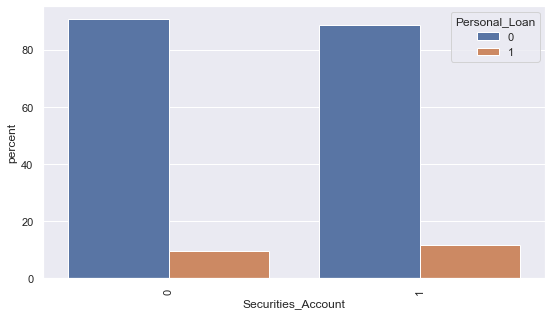

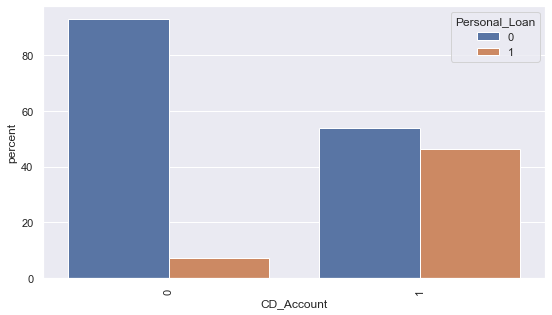

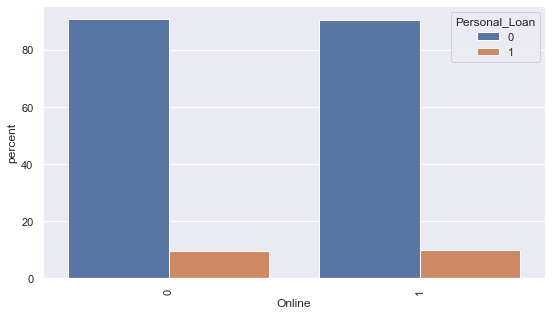

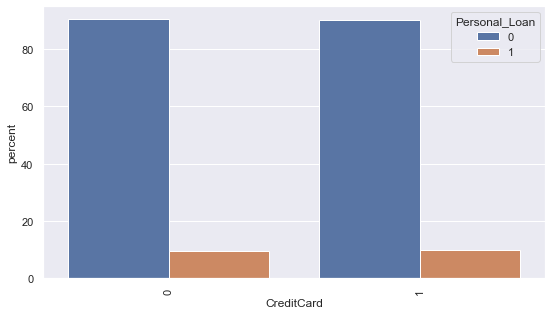

In [78]:
#Catgorical varibales vs Personal_Loan

sns.set(rc={'figure.figsize':(9,5)}) #size of the plot
cat_col = ['Family', 'Education',  'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
y = 'Personal_Loan'

for i in cat_col:
    pl_counts = (df2.groupby(i)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index()
                 .sort_values('Personal_Loan'))
    p = sns.barplot(x=i, y='percent', hue='Personal_Loan', data=pl_counts)
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    
    plt.show()

# Insights:

Univariate: 

Creditcard average spending per month(CCAvg), Mortage, Income histograms showed right skewness. This is expected as bank will have a varied customer pool. No treatment applied as it will increase bias.

#Bivariate: 

Income, CCAvg, and CD Account columns are highly correlated with Personal loan (Heat map and Violin plot).

Family size, Education, shows a small postive association with personal loan
    
Among CD Account holders personal loan acceptance is relatively higher than non CD holders    

### Get data model ready

Imputed the Negative values in the Experience column to 0 - Also tried median (but f1score went down a little)

Continous variables : Age, Experience, Income, Credit card Avg, Mortgage
were converted into categorical by creating dummies to this column so that it will bring value to the algorithm. 
Also easy to understand the importance.

Dropped ID and Zip code from the model. Zip code doesnt seems to have association with target (please refer to normalized cross tab below.

In [77]:
#Impute Experience less than 0 with 0. Also tried imputing with median, model performance was relatively low.    
df2.loc[df2['Experience'] < 0,'Experience']  = 0
df2['Experience'].min()

0

In [22]:
#Converting Age to Categorical
bins = [22, 35, 45, 55, 68]
cats = ['22-35', '36-45', '46-55', '56-70']
df2['Age_cat'] = pd.cut(df2.Age, bins, labels=cats)
df2[['Age','Age_cat']]

Age Age_cat
0      25   22-35
1      45   36-45
2      39   36-45
3      35   22-35
4      35   22-35
5      37   36-45
6      53   46-55
7      50   46-55
8      35   22-35
9      34   22-35
10     65   56-70
11     29   22-35
12     48   46-55
13     59   56-70
14     67   56-70
15     60   56-70
16     38   36-45
17     42   36-45
18     46   46-55
19     55   46-55
20     56   56-70
21     57   56-70
22     29   22-35
23     44   36-45
24     36   36-45
25     43   36-45
26     40   36-45
27     46   46-55
28     56   56-70
29     38   36-45
30     59   56-70
31     40   36-45
32     53   46-55
33     30   22-35
34     31   22-35
35     48   46-55
36     59   56-70
37     51   46-55
38     42   36-45
39     38   36-45
40     57   56-70
41     34   22-35
42     32   22-35
43     39   36-45
44     46   46-55
45     57   56-70
46     39   36-45
47     37   36-45
48     56   56-70
49     40   36-45
50     32   22-35
51     61   56-70
52     30   22-35
53     50   46-55
54     29   22-35
55     41   36-45
56     55   46-55
57     56   56-70
58     28   22-35
59     31   22-35
60     49   46-55
61     47   46-55
62     42   36-45
63     42   36-45
64     47   46-55
65     59   56-70
66     62   56-70
67     53   46-55
68     47   46-55
69     53   46-55
70     42   36-45
71     53   46-55
72     44   36-45
73     41   36-45
74     28   22-35
75     31   22-35
76     58   56-70
77     46   46-55
78     54   46-55
79     50   46-55
80     60   56-70
81     47   46-55
82     41   36-45
83     33   22-35
84     46   46-55
85     27   22-35
86     40   36-45
87     48   46-55
88     65   56-70
89     25   22-35
90     55   46-55
91     35   22-35
92     43   36-45
93     60   56-70
94     65   56-70
95     38   36-45
96     41   36-45
97     54   46-55
98     49   46-55
99     66   56-70
100    48   46-55
101    61   56-70
102    53   46-55
103    43   36-45
104    56   56-70
105    24   22-35
106    43   36-45
107    42   36-45
108    33   22-35
109    43   36-45
110    41   36-45
111    62   56-70
112    40   36-45
113    58   56-70
114    39   36-45
115    65   56-70
116    54   46-55
117    58   56-70
118    41   36-45
119    32   22-35
120    54   46-55
121    52   46-55
122    58   56-70
123    37   36-45
124    39   36-45
125    60   56-70
126    31   22-35
127    34   22-35
128    38   36-45
129    41   36-45
130    28   22-35
131    58   56-70
132    31   22-35
133    30   22-35
134    53   46-55
135    58   56-70
136    59   56-70
137    49   46-55
138    59   56-70
139    59   56-70
140    51   46-55
141    35   22-35
142    33   22-35
143    25   22-35
144    49   46-55
145    59   56-70
146    46   46-55
147    50   46-55
148    52   46-55
149    48   46-55
150    46   46-55
151    26   22-35
152    57   56-70
153    60   56-70
154    54   46-55
155    24   22-35
156    26   22-35
157    41   36-45
158    32   22-35
159    61   56-70
160    29   22-35
161    61   56-70
162    38   36-45
163    28   22-35
164    53   46-55
165    27   22-35
166    25   22-35
167    33   22-35
168    50   46-55
169    27   22-35
170    27   22-35
171    52   46-55
172    38   36-45
173    58   56-70
174    42   36-45
175    45   36-45
176    52   46-55
177    29   22-35
178    53   46-55
179    62   56-70
180    51   46-55
181    36   36-45
182    24   22-35
183    29   22-35
184    52   46-55
185    39   36-45
186    48   46-55
187    46   46-55
188    64   56-70
189    55   46-55
190    60   56-70
191    51   46-55
192    50   46-55
193    48   46-55
194    53   46-55
195    34   22-35
196    48   46-55
197    55   46-55
198    27   22-35
199    36   36-45
200    32   22-35
201    35   22-35
202    30   22-35
203    58   56-70
204    56   56-70
205    38   36-45
206    49   46-55
207    34   22-35
208    40   36-45
209    64   56-70
210    51   46-55
211    44   36-45
212    46   46-55
213    57   56-70
214    54   46-55
215    38   36-45
216    27   22-35
217    39   36-45
218    44   36-45
219    56   56-70
220    32   22-35
221    45 

In [23]:
#Converting Experience to Categorical
bins = [-10, 0, 10, 20, 30, 44]
cats = ['-10-0', '1-10', '11-20', '21-30', '31-45']
df2['Experience_cat'] = pd.cut(df2.Experience, bins, labels=cats)
df2[['Experience','Experience_cat']]

Experience Experience_cat
0              1           1-10
1             19          11-20
2             15          11-20
3              9           1-10
4              8           1-10
5             13          11-20
6             27          21-30
7             24          21-30
8             10           1-10
9              9           1-10
10            39          31-45
11             5           1-10
12            23          21-30
13            32          31-45
14            41          31-45
15            30          21-30
16            14          11-20
17            18          11-20
18            21          21-30
19            28          21-30
20            31          31-45
21            27          21-30
22             5           1-10
23            18          11-20
24            11          11-20
25            19          11-20
26            16          11-20
27            20          11-20
28            30          21-30
29            13          11-20
30            35          31-45
31            16          11-20
32            28          21-30
33             6           1-10
34             5           1-10
35            24          21-30
36            35          31-45
37            25          21-30
38            18          11-20
39            13          11-20
40            32          31-45
41             9           1-10
42             7           1-10
43            15          11-20
44            20          11-20
45            31          31-45
46            14          11-20
47            12          11-20
48            26          21-30
49            16          11-20
50             8           1-10
51            37          31-45
52             6           1-10
53            26          21-30
54             5           1-10
55            17          11-20
56            30          21-30
57            31          31-45
58             2           1-10
59             5           1-10
60            24          21-30
61            21          21-30
62            18          11-20
63            17          11-20
64            23          21-30
65            35          31-45
66            36          31-45
67            23          21-30
68            21          21-30
69            29          21-30
70            18          11-20
71            29          21-30
72            20          11-20
73            16          11-20
74             3           1-10
75             7           1-10
76            32          31-45
77            20          11-20
78            30          21-30
79            26          21-30
80            36          31-45
81            22          21-30
82            16          11-20
83             9           1-10
84            22          21-30
85             2           1-10
86            16          11-20
87            22          21-30
88            41          31-45
89             0          -10-0
90            30          21-30
91            10           1-10
92            19          11-20
93            34          31-45
94            39          31-45
95            12          11-20
96            15          11-20
97            28          21-30
98            23          21-30
99            41          31-45
100           23          21-30
101           36          31-45
102           23          21-30
103           18          11-20
104           32          31-45
105            0          -10-0
106           17          11-20
107           18          11-20
108            7           1-10
109           17          11-20
110           14          11-20
111           38          31-45
112           15          11-20
113           34          31-45
114           14          11-20
115           40          31-45
116           29          21-30
117           33          31-45
118           16          11-20
119            7           1-10
120           29          21-30
121           26          21-30
122           32          31-45
123           13          11-20
124   

In [24]:
#Converting Income to Categorical
bins = [7, 40, 65,  100, 225]
cats = ['7-40', '41-65', '66-100', '101-225']
df2['Income_cat'] = pd.cut(df2.Income, bins, labels=cats)
df2[['Income','Income_cat']]

Income Income_cat
0         49      41-65
1         34       7-40
2         11       7-40
3        100     66-100
4         45      41-65
5         29       7-40
6         72     66-100
7         22       7-40
8         81     66-100
9        180    101-225
10       105    101-225
11        45      41-65
12       114    101-225
13        40       7-40
14       112    101-225
15        22       7-40
16       130    101-225
17        81     66-100
18       193    101-225
19        21       7-40
20        25       7-40
21        63      41-65
22        62      41-65
23        43      41-65
24       152    101-225
25        29       7-40
26        83     66-100
27       158    101-225
28        48      41-65
29       119    101-225
30        35       7-40
31        29       7-40
32        41      41-65
33        18       7-40
34        50      41-65
35        81     66-100
36       121    101-225
37        71     66-100
38       141    101-225
39        80     66-100
40        84     66-100
41        60      41-65
42       132    101-225
43        45      41-65
44       104    101-225
45        52      41-65
46        43      41-65
47       194    101-225
48        81     66-100
49        49      41-65
50         8       7-40
51       131    101-225
52        72     66-100
53       190    101-225
54        44      41-65
55       139    101-225
56        29       7-40
57       131    101-225
58        93     66-100
59       188    101-225
60        39       7-40
61       125    101-225
62        22       7-40
63        32       7-40
64       105    101-225
65       131    101-225
66       105    101-225
67        45      41-65
68        60      41-65
69        20       7-40
70       115    101-225
71        69     66-100
72       130    101-225
73        85     66-100
74       135    101-225
75       135    101-225
76        12       7-40
77        29       7-40
78       133    101-225
79        19       7-40
80        41      41-65
81        40       7-40
82        82     66-100
83        50      41-65
84        18       7-40
85       109    101-225
86        42      41-65
87        78     66-100
88        51      41-65
89       113    101-225
90       118    101-225
91        29       7-40
92        34       7-40
93        64      41-65
94       121    101-225
95        48      41-65
96        80     66-100
97       161    101-225
98        94     66-100
99        15       7-40
100       74     66-100
101       30       7-40
102       44      41-65
103       22       7-40
104       38       7-40
105       35       7-40
106       69     66-100
107       43      41-65
108       32       7-40
109       49      41-65
110        9       7-40
111       45      41-65
112       82     66-100
113       92     66-100
114       39       7-40
115       81     66-100
116       35       7-40
117       61      41-65
118       73     66-100
119      112    101-225
120       12       7-40
121       38       7-40
122       73     66-100
123       84     66-100
124       78     66-100
125       80     66-100
126      115    101-225
127       82     66-100
128       74     66-100
129       70     66-100
130       81     66-100
131      149    101-225
132       51      41-65
133       39       7-40
134       98     66-100
135       45      41-65
136       49      41-65
137      128    101-225
138       42      41-65
139       18       7-40
140       31       7-40
141       58      41-65
142       48      41-65
143       54      41-65
144       70     66-100
145      124    101-225
146       84     66-100
147       83     66-100
148      163    101-225
149       42      41-65
150      118    101-225
151      132    101-225
152       24       7-40
153       22       7-40
154       58      41-65
155       60      41-65
156       15       7-40
157       83     66-100
158       79     66-100
159       41      41-65
160      134    101-225
161       80     66-100
162       52      41-65
163       70     66-100
164       92     66-100
165       43      41-6

In [25]:
#Converting Mortgage to Categorical
bins = [-10, 0, 100, 225, 636]
cats = ['-10-0', '1-100', '101-225', '226-636']
df2['Mortgage_cat'] = pd.cut(df2.Mortgage, bins, labels=cats)
df2[['Mortgage','Mortgage_cat']]

Mortgage Mortgage_cat
0            0        -10-0
1            0        -10-0
2            0        -10-0
3            0        -10-0
4            0        -10-0
5          155      101-225
6            0        -10-0
7            0        -10-0
8          104      101-225
9            0        -10-0
10           0        -10-0
11           0        -10-0
12           0        -10-0
13           0        -10-0
14           0        -10-0
15           0        -10-0
16         134      101-225
17           0        -10-0
18           0        -10-0
19           0        -10-0
20         111      101-225
21           0        -10-0
22         260      226-636
23         163      101-225
24         159      101-225
25          97        1-100
26           0        -10-0
27           0        -10-0
28           0        -10-0
29           0        -10-0
30         122      101-225
31           0        -10-0
32         193      101-225
33           0        -10-0
34           0        -10-0
35           0        -10-0
36           0        -10-0
37         198      101-225
38           0        -10-0
39         285      226-636
40           0        -10-0
41           0        -10-0
42         412      226-636
43           0        -10-0
44           0        -10-0
45           0        -10-0
46         153      101-225
47         211      101-225
48           0        -10-0
49           0        -10-0
50           0        -10-0
51           0        -10-0
52         207      101-225
53         240      226-636
54           0        -10-0
55           0        -10-0
56           0        -10-0
57           0        -10-0
58           0        -10-0
59         455      226-636
60           0        -10-0
61         112      101-225
62           0        -10-0
63           0        -10-0
64           0        -10-0
65           0        -10-0
66         336      226-636
67         132      101-225
68           0        -10-0
69           0        -10-0
70           0        -10-0
71           0        -10-0
72           0        -10-0
73           0        -10-0
74           0        -10-0
75           0        -10-0
76           0        -10-0
77           0        -10-0
78           0        -10-0
79         118      101-225
80         174      101-225
81           0        -10-0
82           0        -10-0
83           0        -10-0
84           0        -10-0
85           0        -10-0
86         126      101-225
87           0        -10-0
88           0        -10-0
89           0        -10-0
90           0        -10-0
91           0        -10-0
92           0        -10-0
93         236      226-636
94           0        -10-0
95           0        -10-0
96           0        -10-0
97           0        -10-0
98           0        -10-0
99           0        -10-0
100          0        -10-0
101          0        -10-0
102        198      101-225
103          0        -10-0
104        166      101-225
105          0        -10-0
106          0        -10-0
107        136      101-225
108        166      101-225
109          0        -10-0
110          0        -10-0
111          0        -10-0
112        309      226-636
113        103      101-225
114          0        -10-0
115          0        -10-0
116          0        -10-0
117        193      101-225
118          0        -10-0
119        366      226-636
120          0        -10-0
121          0        -10-0
122          0        -10-0
123          0        -10-0
124        118      101-225
125          0        -10-0
126        101      101-225
127        251      226-636
128          0        -10-0
129          0        -10-0
130        276      226-636
131          0        -10-0
132          0        -10-0
133          0        -10-0
134          0        -10-0
135          0        -10-0
136          0        -10-0
137          0        -10-0
138          0        -10-0
139          0        -10-0
140        161      101-225
141        149      101-225
14

In [26]:
#Converting CCAvg to Categorical
bins = [-1, 0, 2.5, 5, 11]
cats = ['-1-0', '1-2.5', '2.6-5.0', '5.1-11']
df2['CCAvg_cat'] = pd.cut(df2.CCAvg, bins, labels=cats)
df2[['CCAvg','CCAvg_cat']]

CCAvg CCAvg_cat
0      1.60     1-2.5
1      1.50     1-2.5
2      1.00     1-2.5
3      2.70   2.6-5.0
4      1.00     1-2.5
5      0.40     1-2.5
6      1.50     1-2.5
7      0.30     1-2.5
8      0.60     1-2.5
9      8.90    5.1-11
10     2.40     1-2.5
11     0.10     1-2.5
12     3.80   2.6-5.0
13     2.50     1-2.5
14     2.00     1-2.5
15     1.50     1-2.5
16     4.70   2.6-5.0
17     2.40     1-2.5
18     8.10    5.1-11
19     0.50     1-2.5
20     0.90     1-2.5
21     2.00     1-2.5
22     1.20     1-2.5
23     0.70     1-2.5
24     3.90   2.6-5.0
25     0.50     1-2.5
26     0.20     1-2.5
27     2.40     1-2.5
28     2.20     1-2.5
29     3.30   2.6-5.0
30     1.20     1-2.5
31     2.00     1-2.5
32     0.60     1-2.5
33     0.90     1-2.5
34     1.80     1-2.5
35     0.70     1-2.5
36     2.90   2.6-5.0
37     1.40     1-2.5
38     5.00   2.6-5.0
39     0.70     1-2.5
40     1.60     1-2.5
41     2.30     1-2.5
42     1.10     1-2.5
43     0.70     1-2.5
44     5.70    5.1-11
45     2.50     1-2.5
46     0.70     1-2.5
47     0.20     1-2.5
48     4.50   2.6-5.0
49     1.80     1-2.5
50     0.70     1-2.5
51     2.90   2.6-5.0
52     0.10     1-2.5
53     2.10     1-2.5
54     0.20     1-2.5
55     8.00    5.1-11
56     0.10     1-2.5
57     1.20     1-2.5
58     0.20     1-2.5
59     4.50   2.6-5.0
60     1.70     1-2.5
61     5.70    5.1-11
62     1.00     1-2.5
63     0.00      -1-0
64     3.30   2.6-5.0
65     3.80   2.6-5.0
66     2.80   2.6-5.0
67     2.00     1-2.5
68     2.10     1-2.5
69     0.20     1-2.5
70     3.50   2.6-5.0
71     1.00     1-2.5
72     5.00   2.6-5.0
73     4.00   2.6-5.0
74     3.30   2.6-5.0
75     3.80   2.6-5.0
76     0.30     1-2.5
77     0.50     1-2.5
78     2.60   2.6-5.0
79     0.40     1-2.5
80     1.30     1-2.5
81     2.70   2.6-5.0
82     4.00   2.6-5.0
83     2.40     1-2.5
84     0.90     1-2.5
85     1.80     1-2.5
86     2.20     1-2.5
87     1.10     1-2.5
88     1.10     1-2.5
89     2.30     1-2.5
90     5.60    5.1-11
91     1.10     1-2.5
92     0.60     1-2.5
93     1.70     1-2.5
94     2.00     1-2.5
95     0.20     1-2.5
96     5.20    5.1-11
97     2.90   2.6-5.0
98     0.30     1-2.5
99     0.10     1-2.5
100    1.20     1-2.5
101    1.30     1-2.5
102    1.00     1-2.5
103    0.30     1-2.5
104    1.30     1-2.5
105    0.10     1-2.5
106    2.90   2.6-5.0
107    0.70     1-2.5
108    0.60     1-2.5
109    2.80   2.6-5.0
110    1.00     1-2.5
111    1.30     1-2.5
112    1.00     1-2.5
113    2.80   2.6-5.0
114    0.50     1-2.5
115    1.80     1-2.5
116    1.50     1-2.5
117    2.30     1-2.5
118    3.00   2.6-5.0
119    4.60   2.6-5.0
120    0.20     1-2.5
121    0.90     1-2.5
122    0.70     1-2.5
123    3.60   2.6-5.0
124    2.40     1-2.5
125    0.50     1-2.5
126    1.30     1-2.5
127    2.70   2.6-5.0
128    0.00      -1-0
129    0.50     1-2.5
130    1.50     1-2.5
131    7.20    5.1-11
132    1.75     1-2.5
133    1.10     1-2.5
134    1.80     1-2.5
135    2.10     1-2.5
136    2.50     1-2.5
137    0.40     1-2.5
138    1.50     1-2.5
139    1.20     1-2.5
140    0.40     1-2.5
141    2.00     1-2.5
142    2.10     1-2.5
143    1.60     1-2.5
144    1.50     1-2.5
145    7.40    5.1-11
146    2.67   2.6-5.0
147    3.60   2.6-5.0
148    0.40     1-2.5
149    2.20     1-2.5
150    7.50    5.1-11
151    6.50    5.1-11
152    1.30     1-2.5
153    1.00     1-2.5
154    1.30     1-2.5
155    1.60     1-2.5
156    0.40     1-2.5
157    2.67   2.6-5.0
158    1.50     1-2.5
159    1.70     1-2.5
160    6.50    5.1-11
161    2.80   2.6-5.0
162    2.00     1-2.5
163    2.60   2.6-5.0
164    1.10     1-2.5
165    1.50     1-2.5
166    1.00     1-2.5
167    0.90     1-2.5
168    1.00     1-2.5
169    2.10     1-2.5
170    2.00     1-2.5
171    0.40     1-2.5
172    7.80    5.1-11
173    1.50     1-2.5
174    7.90    5.1-11
175    1.10     1-2.5
176    1.00     1-2.5
177    1.80     1-2.5
178    0.20     1-2.5
179    0.10     1-2.5
180    1.00     1-2.5
18

In [27]:
colx = 'Age_cat','Experience_cat','Income_cat','Mortgage_cat','CCAvg_cat'
for i in colx:
    print(i)
    print(pd.crosstab(df2[i],df2['Personal_Loan'],margins=True))
    print('')

Age_cat
Personal_Loan     0    1   All
Age_cat                       
22-35          1140  134  1274
36-45          1131  114  1245
46-55          1147  118  1265
56-70          1102  114  1216
All            4520  480  5000

Experience_cat
Personal_Loan      0    1   All
Experience_cat                 
-10-0            111    7   118
1-10            1045  126  1171
11-20           1135  118  1253
21-30           1182  119  1301
31-45           1047  110  1157
All             4520  480  5000

Income_cat
Personal_Loan     0    1   All
Income_cat                    
7-40           1390    0  1390
41-65          1217    3  1220
66-100         1139   39  1178
101-225         774  438  1212
All            4520  480  5000

Mortgage_cat
Personal_Loan     0    1   All
Mortgage_cat                  
-10-0          3150  312  3462
1-100           269   13   282
101-225         814   51   865
226-636         287  104   391
All            4520  480  5000

CCAvg_cat
Personal_Loan     0    1   All
C

In [76]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
colx = 'Age_cat','Experience_cat','Income_cat','Mortgage_cat','CCAvg_cat','ZIP_Code'
for i in colx:
    print(i)
    print(pd.crosstab(df2[i],df2['Personal_Loan'],margins=True,normalize='columns'))
    print('')

Age_cat
Personal_Loan    0    1  All
Age_cat                     
22-35         0.25 0.28 0.25
36-45         0.25 0.24 0.25
46-55         0.25 0.25 0.25
56-70         0.24 0.24 0.24

Experience_cat
Personal_Loan     0    1  All
Experience_cat               
-10-0          0.02 0.01 0.02
1-10           0.23 0.26 0.23
11-20          0.25 0.25 0.25
21-30          0.26 0.25 0.26
31-45          0.23 0.23 0.23

Income_cat
Personal_Loan    0    1  All
Income_cat                  
7-40          0.31 0.00 0.28
41-65         0.27 0.01 0.24
66-100        0.25 0.08 0.24
101-225       0.17 0.91 0.24

Mortgage_cat
Personal_Loan    0    1  All
Mortgage_cat                
-10-0         0.70 0.65 0.69
1-100         0.06 0.03 0.06
101-225       0.18 0.11 0.17
226-636       0.06 0.22 0.08

CCAvg_cat
Personal_Loan    0    1  All
CCAvg_cat                   
-1-0          0.02 0.00 0.02
1-2.5         0.78 0.24 0.73
2.6-5.0       0.15 0.47 0.18
5.1-11        0.05 0.29 0.07

ZIP_Code
Personal_Loan    0    1

In [29]:
ID = df2['ID']
X=df2.drop(columns=['ID', 'Age', 'Experience', 'Income', 'ZIP_Code','CCAvg','Mortgage', 'Personal_Loan'])
y=df2['Personal_Loan']

In [30]:
X=pd.get_dummies(data=X,drop_first=True)

In [31]:
X.describe(include="all")

Family  Education  Securities_Account  CD_Account  Online  CreditCard  \
count 5000.00    5000.00             5000.00     5000.00 5000.00     5000.00   
mean     2.40       1.88                0.10        0.06    0.60        0.29   
std      1.15       0.84                0.31        0.24    0.49        0.46   
min      1.00       1.00                0.00        0.00    0.00        0.00   
25%      1.00       1.00                0.00        0.00    0.00        0.00   
50%      2.00       2.00                0.00        0.00    1.00        0.00   
75%      3.00       3.00                0.00        0.00    1.00        1.00   
max      4.00       3.00                1.00        1.00    1.00        1.00   

       Age_cat_36-45  Age_cat_46-55  Age_cat_56-70  Experience_cat_1-10  \
count        5000.00        5000.00        5000.00              5000.00   
mean            0.25           0.25           0.24                 0.23   
std             0.43           0.43           0.43                 0.42   
min             0.00           0.00           0.00                 0.00   
25%             0.00           0.00           0.00                 0.00   
50%             0.00           0.00           0.00                 0.00   
75%             0.00           1.00           0.00                 0.00   
max             1.00           1.00           1.00                 1.00   

       Experience_cat_11-20  Experience_cat_21-30  Experience_cat_31-45  \
count               5000.00               5000.00               5000.00   
mean                   0.25                  0.26                  0.23   
std                    0.43                  0.44                  0.42   
min                    0.00                  0.00                  0.00   
25%                    0.00                  0.00                  0.00   
50%                    0.00                  0.00                  0.00   
75%                    1.00                  1.00                  0.00   
max                    1.00                  1.00                  1.00   

       Income_cat_41-65  Income_cat_66-100  Income_cat_101-225  \
count           5000.00            5000.00             5000.00   
mean               0.24               0.24                0.24   
std                0.43               0.42                0.43   
min                0.00               0.00                0.00   
25%                0.00               0.00                0.00   
50%                0.00               0.00                0.00   
75%                0.00               0.00                0.00   
max                1.00               1.00                1.00   

       Mortgage_cat_1-100  Mortgage_cat_101-225  Mortgage_cat_226-636  \
count             5000.00               5000.00               5000.00   
mean                 0.06                  0.17                  0.08   
std                  0.23                  0.38                  0.27   
min                  0.00                  0.00                  0.00   
25%                  0.00                  0.00                  0.00   
50%                  0.00                  0.00                  0.00   
75%                  0.00                  0.00                  0.00   
max                  1.00                  1.00                  1.00   

       CCAvg_cat_1-2.5  CCAvg_cat_2.6-5.0  CCAvg_cat_5.1-11  
count          5000.00            5000.00           5000.00  
mean              0.73               0.18              0.07  
std               0.44               0.38              0.25  
min               0.00               0.00              0.00  
25%               0.00               0.00              0.00  
50%               1.00               0.00              0.00  
75%               1.00               0.00              0.00  
max               1.00               1.00              1.00

### Task3: Split the data into training and test set in the ratio of 70:30 respectively

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7,stratify=y)
#'stratify' argument maintains the distribution of classes in train and test sets same as original dataset.

In [33]:
y_train.value_counts()

0    3164
1     336
Name: Personal_Loan, dtype: int64

In [34]:
y_test.value_counts()

0    1356
1     144
Name: Personal_Loan, dtype: int64

### Task4: Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix

### Logistic Regression Model

In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Model metrics

In [36]:
accuracy_score(y_test, y_pred)

0.9553333333333334

In [37]:
recall_score(y_test,y_pred)

0.6666666666666666

In [38]:
precision_score(y_test, y_pred)

0.8347826086956521

In [39]:
f1_score(y_test, y_pred)

0.7413127413127412

In [40]:
roc_auc_score(y_test,y_pred)

0.8263274336283185

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.83      0.67      0.74       144

    accuracy                           0.96      1500
   macro avg       0.90      0.83      0.86      1500
weighted avg       0.95      0.96      0.95      1500



### Build Confusion Matrix

In [42]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = model.predict_proba(X_test)[:,1]

z['Predicted'] = model.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

In [43]:
z.head(5)

Actual  Probaility that output is 0  Probaility that output is 1  Predicted
0       0                         0.99                         0.01          0
1       0                         0.95                         0.05          0
2       0                         0.98                         0.02          0
3       0                         0.82                         0.18          0
4       0                         1.00                         0.00          0

In [44]:
cf_matrix = confusion_matrix(z['Actual'], z['Predicted'])
print(cf_matrix)

[[1337   19]
 [  48   96]]


Text(0.5, 21.5, 'Predicted label')

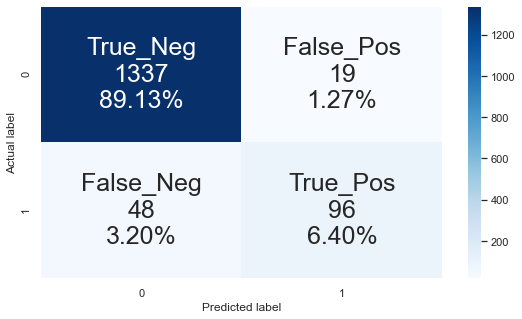

In [45]:
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size":25})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Task5: Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.

In [47]:
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary()

         Current function value: 0.105385
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3477
Method:                           MLE   Df Model:                           22
Date:                Mon, 11 Jan 2021   Pseudo R-squ.:                  0.6667
Time:                        18:20:12   Log-Likelihood:                -368.85
converged:                      False   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                4.725e-299
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -50.9376   5.75e+05  -8.86e-05      1.000   -1.13e+06    1.13e+06
Family                   0.6245      0.094      6.670      0.000       0.441       0.808
Education                1.9235      0.146     13.135      0.000       1.636       2.211
Securities_Account      -1.7690      0.414     -4.268      0.000      -2.581      -0.957
CD_Account               4.3937      0.451      9.732      0.000       3.509       5.279
Online                  -0.7315      0.207     -3.534      0.000      -1.137      -0.326
CreditCard              -1.4452      0.275     -5.261      0.000      -1.984      -0.907
Age_cat_36-45            0.4625      0.857      0.539      0.590      -1.218       2.143
Age_cat_46-55           -0.1858      1.082     -0.172      0.864      -2.307       1.936
Age_cat_56-70            0.0758      1.255      0.060      0.952      -2.385       2.536
Experience_cat_1-10      2.1908      0.758      2.892      0.004       0.706       3.676
Experience_cat_11-20     1.8815      1.126      1.671      0.095      -0.325       4.088
Experience_cat_21-30     2.6685      1.307      2.042      0.041       0.107       5.229
Experience_cat_31-45     2.0629      1.460      1.413      0.158      -0.798       4.924
Income_cat_41-65        27.1252   5.75e+05   4.72e-05      1.000   -1.13e+06    1.13e+06
Income_cat_66-100       29.2422   5.75e+05   5.08e-05      1.000   -1.13e+06    1.13e+06
Income_cat_101-225      33.9733   5.75e+05   5.91e-05      1.000   -1.13e+06    1.13e+06
Mortgage_cat_1-100       0.6778      0.658      1.030      0.303      -0.611       1.967
Mortgage_cat_101-225     0.3292      0.322      1.024      0.306      -0.301       0.959
Mortgage_cat_226-636     0.3605      0.257      1.404      0.160      -0.143       0.864
CCAvg_cat_1-2.5          8.9892     76.241      0.118      0.906    -140.439     158.418
CCAvg_cat_2.6-5.0       10.6127     76.240      0.139      0.889    -138.816     160.041
CCAvg_cat_5.1-11        10.2861     76.241      0.135      0.893    -139.143     159.715
========================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Coefficients of all the attributes as output in a data frame with column names

In [51]:
def results_summary_to_dataframe(lg):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    #pvals = lg.pvalues
    coeff = lg.params
    #conf_lower = lg.conf_int()[0]
    #conf_higher = lg.conf_int()[1]

    lg_df = pd.DataFrame({"coeff":coeff})

    #Reordering...
    lg_df = lg_df[["coeff"]]
    lg_df = lg_df.sort_values(by=['coeff'], ascending=False, inplace=False)
    return lg_df

results_summary_to_dataframe(lg)

coeff
Income_cat_101-225    33.97
Income_cat_66-100     29.24
Income_cat_41-65      27.13
CCAvg_cat_2.6-5.0     10.61
CCAvg_cat_5.1-11      10.29
CCAvg_cat_1-2.5        8.99
CD_Account             4.39
Experience_cat_21-30   2.67
Experience_cat_1-10    2.19
Experience_cat_31-45   2.06
Education              1.92
Experience_cat_11-20   1.88
Mortgage_cat_1-100     0.68
Family                 0.62
Age_cat_36-45          0.46
Mortgage_cat_226-636   0.36
Mortgage_cat_101-225   0.33
Age_cat_56-70          0.08
Age_cat_46-55         -0.19
Online                -0.73
CreditCard            -1.45
Securities_Account    -1.77
const                -50.94

### Test data where predicted class is not equal to the observed class

In [63]:
error_result = y_test.to_frame('Actual')
error_result.insert(1, 'Predicted',y_pred)
error_result = ID.to_frame().join(error_result, how='inner')
error_result =  error_result[error_result['Actual'] != error_result ['Predicted']]
error_result

ID  Actual  Predicted
12      13       0          1
150    151       0          1
169    170       0          1
318    319       0          1
323    324       1          0
382    383       1          0
430    431       0          1
473    474       1          0
505    506       1          0
770    771       1          0
785    786       0          1
895    896       0          1
896    897       1          0
914    915       1          0
951    952       1          0
975    976       1          0
1007  1008       1          0
1129  1130       1          0
1161  1162       1          0
1164  1165       1          0
1176  1177       1          0
1320  1321       1          0
1328  1329       1          0
1372  1373       1          0
1577  1578       1          0
1579  1580       1          0
1616  1617       1          0
1674  1675       1          0
1972  1973       0          1
2268  2269       1          0
2314  2315       0          1
2371  2372       0          1
2391  2392       1          0
2539  2540       1          0
2586  2587       1          0
2625  2626       0          1
2772  2773       1          0
2874  2875       1          0
2970  2971       1          0
3217  3218       1          0
3271  3272       1          0
3274  3275       0          1
3308  3309       0          1
3318  3319       1          0
3382  3383       0          1
3383  3384       1          0
3403  3404       1          0
3426  3427       0          1
3501  3502       0          1
3541  3542       1          0
3573  3574       1          0
3651  3652       1          0
3747  3748       1          0
3983  3984       1          0
4023  4024       1          0
4190  4191       1          0
4302  4303       1          0
4327  4328       0          1
4354  4355       1          0
4418  4419       1          0
4470  4471       1          0
4583  4584       1          0
4593  4594       1          0
4604  4605       1          0
4652  4653       1          0
4671  4672       0          1
4697  4698       0          1

In [64]:
error_result.count()

ID           67
Actual       67
Predicted    67
dtype: int64

### Task6: Give conclusion related to the Business understanding of your model? 


Top three drivers for a customer to acccept the personal loan offer are their&nbsp;
1. Income: Annual income of the customer&nbsp;
2. CCAvg: Avg. spending on credit cards per month&nbsp;
3. CD Account: Whether the customer have a certificate of deposit (CD) account with the bank&nbsp;
Other minor factors are Experience, Education.&nbsp;


Developed a Prediction model and their following performance metrics are given below:&nbsp;

1. Precision (proportion of positive identifications was actually correct) 0.83&nbsp;  
2. Recall (proportion of actual positives was identified correctly) 0.66&nbsp;  
3. F1-Score 0.74&nbsp;   
4. ROC 0.83&nbsp; 
5. TP(6.4%), FP(1.2%), TN(89%), FN(3.2%)&nbsp;  

Increasing and decreasing the probability threshold didn't improve the model performance&nbsp;

Bank wants to predict the likelihood of a customer accepting the personal loan.&nbsp;   
Given this model, we can market to potential personal loan customers.&nbsp;     
If marketing spend is critical, lower the False positive rate is better and infact this model FP rate is lower.&nbsp;   

If marketing spend is minimal-per-contact as per the ROI, we can include more customers based on top drivers&nbsp;  
and/or modify the model by tuning the threshold as per the business need (to reduce False Negative).&nbsp;  



